# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
requests.get(btc_url)
response_btc_data = requests.get(btc_url)
current_btc_price = response_btc_data.content
# Convert data to json format
import json
current_btc_price = response_btc_data.json()
print(json.dumps(current_btc_price, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18733587,
            "total_supply": 18733587,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 35210.0,
                    "volume_24h": 30493673410,
                    "market_cap": 659736135949,
                    "percentage_change_1h": 0.246002226892399,
                    "percentage_change_24h": -0.308376200153556,
                    "percentage_change_7d": -0.946912737877102,
                    "percent_change_1h": 0.246002226892399,
                    "percent_change_24h": -0.308376200153556,
                    "percent_change_7d": -0.946912737877102
                },
                "CAD": {
                    "price": 42797.755,
                    "volume_24h": 37065060029.855,
                 

In [6]:
# Identify current BTC price
current_btc_price = current_btc_price['data']['1']['quotes']['CAD']['price']
print(current_btc_price)

42797.755


In [7]:
# Fetch current ETH price
# YOUR CODE HERE!
requests.get(eth_url)
response_eth_data = requests.get(eth_url)
current_eth_price = response_eth_data.content
# Convert data to json format
import json 
current_eth_price = response_eth_data.json()
print(json.dumps(current_eth_price, indent=4))


{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 116269232,
            "total_supply": 116269232,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 2336.39,
                    "volume_24h": 26465871368,
                    "market_cap": 271144938536,
                    "percentage_change_1h": 0.0657075751759704,
                    "percentage_change_24h": 1.72454385968459,
                    "percentage_change_7d": -10.9869977381812,
                    "percent_change_1h": 0.0657075751759704,
                    "percent_change_24h": 1.72454385968459,
                    "percent_change_7d": -10.9869977381812
                },
                "CAD": {
                    "price": 2839.882045,
                    "volume_24h": 32169266647.804,
                

In [8]:
# Identify current ETH price
current_eth_price = current_eth_price['data']['1027']['quotes']['CAD']['price']
print(current_eth_price)

2839.882045


In [9]:
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * current_btc_price
my_eth_value = my_eth * current_eth_price

In [10]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $51357.31
The current value of your 5.3 ETH is $15051.37


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [11]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [12]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [13]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2021-06-11", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
all_portfolios_df = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit = 1000
).df
#drop time in the date columns
all_portfolios_df.index = all_portfolios_df.index.date
all_portfolios_df.index.rename("Date", inplace=True)

# Preview DataFrame
# YOUR CODE HERE!
all_portfolios_df.head()

AGG                                      SPY                  \
              open    high     low   close   volume    open    high     low   
Date                                                                          
2021-06-11  115.31  115.32  115.16  115.24  3470062  424.19  424.42  422.82   

                              
             close    volume  
Date                          
2021-06-11  424.32  37014839

In [14]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(all_portfolios_df["AGG"]["close"])
spy_close_price = float(all_portfolios_df["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price ${agg_close_price}")
print(f"Current SPY closing price ${spy_close_price}")

Current AGG closing price $115.24
Current SPY closing price $424.32


In [15]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price
# Print current value of shares
print(f"The current value of your {my_agg} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_spy} AGG shares is ${my_agg_value:0.2f}")

The current value of your 200 SPY shares is $21216.00
The current value of your 50 AGG shares is $23048.00


### Savings Health Analysis

In [16]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Consolidate financial assets data
# YOUR CODE HERE!
total_crypto = my_btc_value + my_eth_value
total_shares = my_agg_value + my_spy_value
# Create savings DataFrame
# YOUR CODE HERE!
value_data = {
    "amount":[total_crypto, total_shares]
} 
# Now, create savings DataFrame incorporating above variable
df_savings = pd.DataFrame(value_data,index=['Crypto','Shares'])
# Display savings DataFrame
df_savings

amount
Crypto  66408.680838
Shares  44264.000000

array([<AxesSubplot:ylabel='amount'>], dtype=object)

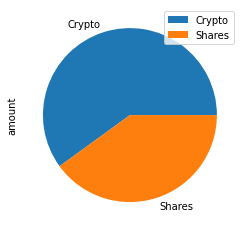

In [17]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot(kind="pie",subplots=True)

In [18]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = df_savings.sum().item()
# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print("Congratulations!!! you reached your goal, your monthly income has mre than double the funds in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations on reaching your Financial goals.")
else:
    print(f"Sorry! you are still ${emergency_fund - total_savings} dollars away from reaching your Financial goal ") 

Congratulations!!! you reached your goal, your monthly income has mre than double the funds in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [19]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [20]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
timeframe= "1D"

tickers = ["AGG","SPY"]
# YOUR CODE HERE!
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df
# drop time
df_stock_data.index = df_stock_data.index.date
df_stock_data.index.rename("Date", inplace=True)
# Display sample data
df_stock_data.head()

AGG                                            SPY          \
              open     high       low    close     volume    open    high   
Date                                                                        
2017-05-10  108.60  108.660  108.4400  108.520  1427511.0     NaN     NaN   
2017-05-11  108.35  108.540  108.3435  108.515  1773499.0  239.35  239.57   
2017-05-12  108.81  108.940  108.7800  108.920  1136553.0  239.09  239.21   
2017-05-15  108.85  108.940  108.8200  108.890  1620264.0  239.47  240.44   
2017-05-16  108.88  109.101  108.8800  109.000  1394153.0  240.62  240.67   

                                         
               low    close      volume  
Date                                     
2017-05-10     NaN      NaN         NaN  
2017-05-11  238.13  239.410  45435690.0  
2017-05-12  238.67  239.030  35283567.0  
2017-05-15  239.45  240.245  42230620.0  
2017-05-16  239.63  240.100  37206183.0

In [21]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirty_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [22]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_thirty_years.portfolio_data.head()


AGG                                                      \
              open     high       low    close     volume daily_return   
Date                                                                     
2017-05-10  108.60  108.660  108.4400  108.520  1427511.0          NaN   
2017-05-11  108.35  108.540  108.3435  108.515  1773499.0    -0.000046   
2017-05-12  108.81  108.940  108.7800  108.920  1136553.0     0.003732   
2017-05-15  108.85  108.940  108.8200  108.890  1620264.0    -0.000275   
2017-05-16  108.88  109.101  108.8800  109.000  1394153.0     0.001010   

               SPY                                                    
              open    high     low    close      volume daily_return  
Date                                                                  
2017-05-10     NaN     NaN     NaN      NaN         NaN          NaN  
2017-05-11  239.35  239.57  238.13  239.410  45435690.0          NaN  
2017-05-12  239.09  239.21  238.67  239.030  35283567.0    -0.001587  
2017-05-15  239.47  240.44  239.45  240.245  42230620.0     0.005083  
2017-05-16  240.62  240.67  239.63  240.100  37206183.0    -0.000604

In [23]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirty_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0          1         2         3          4          5    \
0      1.000000   1.000000  1.000000  1.000000   1.000000   1.000000   
1      0.995447   0.993925  0.995746  1.005056   1.007234   0.994749   
2      0.983658   0.988810  1.002442  1.010535   1.018264   0.977156   
3      0.991051   0.990595  1.004865  1.011228   1.010507   0.988698   
4      0.974078   0.981878  1.008361  1.021668   1.013461   0.987441   
...         ...        ...       ...       ...        ...        ...   
7556  11.921042  39.725189  6.087419  9.743388  29.815365  17.913305   
7557  12.000223  39.294286  6.116742  9.869155  29.899754  17.882606   
7558  12.124761  39.691065  6.078689  9.961451  29.585746  17.928309   
7559  12.273200  39.659647  5.966442  9.805364  29.711147  17.699218   
7560  12.228875  39.456968  6.013699  9.738294  29.878790  17.844266   

           6          7          8          9    ...        490        491  \
0     1.000000   1.000000   1.000000   1.000000  ...   1.000000   1.000000   
1     1.002152   0.993311   1.014427   1.001478  ...   0.990817   0.997521   
2     0.999666   0.992154   1.026585   1.003161  ...   0.985904   0.995956   
3     0.988149   0.986657   1.017491   0.989542  ...   0.982869   0.995228   
4     0.983312   1.000507   1.032663   0.992335  ...   0.987826   0.994205   
...        ...        ...        ...        ...  ...        ...        ...   
7556  5.980313  13.866397  23.846477  52.088875  ...  33.561145  14.014809   
7557  5.983102  13.509826  23.506652  52.043153  ...  33.756316  13.844865   
7558  5.958639  13.517011  23.332250  52.281447  ...  33.474224  13.930722   
7559  5.921022  13.456527  23.461335  51.657658  ...  33.105635  13.806652   
7560  5.904507  13.459519  23.857511  51.187113  ...  32.459267  14.024911   

            492        493        494        495        496        497  \
0      1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
1      1.000787   1.003392   0.993971   1.008353   0.998272   1.014524   
2      0.990697   0.987802   0.990777   1.006089   0.998759   1.016242   
3      0.992163   0.991876   0.992730   1.016386   0.995435   1.020728   
4      1.006670   0.986993   0.990294   1.006123   0.993140   1.023492   
...         ...        ...        ...        ...        ...        ...   
7556  22.605401  14.659944  17.399742  25.865757  19.424994  11.641146   
7557  22.577870  14.647631  17.529877  26.058091  19.411897  11.722461   
7558  22.370763  14.575341  17.642969  26.427519  19.393553  11.774515   
7559  22.523402  14.719632  17.561461  26.233563  19.302254  11.911547   
7560  22.436790  14.762290  17.634730  26.078278  19.330736  11.872038   

            498        499  
0      1.000000   1.000000  
1      1.001406   1.007072  
2      1.000220   1.012744  
3      1.008891   1.011363  
4      1.018068   1.010995  
...         ...        ...  
7556  18.004738  22.505343  
7557  18.073440  22.721683  
7558  18.144514  22.689751  
7559  17.964092  22.576484  
7560  17.815881  22.404950  

[7561 rows x 500 columns]

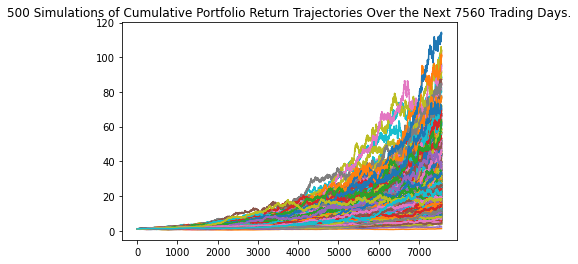

In [24]:
# Plot simulation outcomes
# YOUR CODE HERE!

# Plot simulation outcomes
line_plot = MC_thirty_years.plot_simulation()

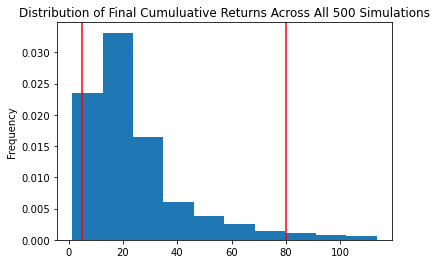

In [25]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_thirty_years.plot_distribution()

### Retirement Analysis

In [26]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
thirty_yr_stat_summary = MC_thirty_years.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(thirty_yr_stat_summary)

count           500.000000
mean             24.180428
std              18.678622
min               1.212210
25%              11.954232
50%              18.289302
75%              29.442983
max             113.438875
95% CI Lower      4.854927
95% CI Upper     80.057504
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [27]:
# Set initial investment
initial_investment = 20000 

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(thirty_yr_stat_summary[8]*initial_investment,2)
ci_upper = round(thirty_yr_stat_summary[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $97098.54 and $1601150.09


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [28]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(thirty_yr_stat_summary[8]*initial_investment,2)
ci_upper = round(thirty_yr_stat_summary[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $145647.81 and $2401725.13


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [29]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_five_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [30]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_five_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.995878  0.987089  1.003622  0.992973  1.005120  0.998054  0.984561   
2     1.008429  0.979287  1.004882  1.005436  1.009112  1.010512  0.977700   
3     1.004513  0.998525  1.009503  1.007083  0.995850  1.007085  0.966611   
4     1.006494  0.996133  1.005960  1.007380  0.995981  0.997172  0.964581   
...        ...       ...       ...       ...       ...       ...       ...   
1256  2.630772  1.097304  1.538055  1.358088  1.797499  1.524757  1.259719   
1257  2.633661  1.098837  1.533398  1.362468  1.793603  1.521225  1.258402   
1258  2.606596  1.088828  1.529355  1.386994  1.769156  1.524516  1.249100   
1259  2.571559  1.091723  1.526050  1.366976  1.759204  1.495357  1.266514   
1260  2.573995  1.093309  1.499429  1.375970  1.781608  1.498641  1.280037   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.002296  1.001903  0.996553  ...  1.005537  1.014192  1.004830   
2     1.003696  1.013899  1.003700  ...  0.998543  1.015133  1.018495   
3     1.006417  1.021917  1.007526  ...  1.006175  1.018747  1.015408   
4     1.000867  1.021204  1.011500  ...  1.016337  1.031476  1.018381   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.703531  1.832044  1.498432  ...  2.107083  1.038889  1.188567   
1257  1.688480  1.847434  1.489034  ...  2.114837  1.033848  1.175932   
1258  1.702102  1.890331  1.501480  ...  2.112147  1.033665  1.177473   
1259  1.678390  1.876293  1.457447  ...  2.101069  1.049127  1.201411   
1260  1.656676  1.890563  1.460400  ...  2.104179  1.051523  1.205119   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.010309  0.995974  0.997272  1.014344  0.994913  0.989690  1.008708  
2     1.014469  0.994033  0.993251  1.024663  0.981837  0.986917  1.000872  
3     1.014414  0.996848  1.004781  1.039326  0.985335  0.985190  0.992085  
4     1.007792  1.001402  0.998993  1.051799  0.986225  0.977169  0.993996  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.335034  1.907542  1.273915  1.830403  3.146360  1.722289  1.320951  
1257  1.331835  1.934676  1.261068  1.828107  3.150695  1.724343  1.326659  
1258  1.331990  1.897519  1.260785  1.823153  3.157664  1.714888  1.341532  
1259  1.334136  1.900575  1.269508  1.829161  3.184433  1.716436  1.329778  
1260  1.340353  1.890758  1.265466  1.824428  3.233900  1.726856  1.318389  

[1261 rows x 500 columns]

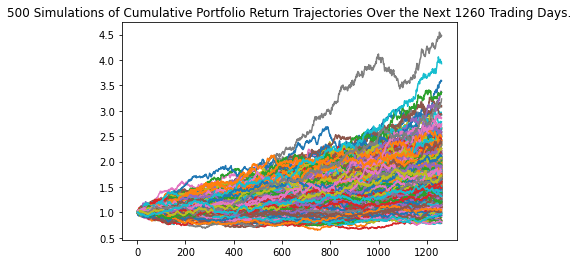

In [31]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_five_years.plot_simulation()

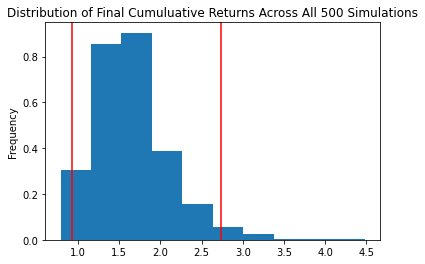

In [32]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_five_years.plot_distribution()

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
five_yr_stat_summary = MC_five_years.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(five_yr_stat_summary)

count           500.000000
mean              1.658012
std               0.476855
min               0.786916
25%               1.340662
50%               1.595577
75%               1.880392
max               4.480852
95% CI Lower      0.926498
95% CI Upper      2.731793
Name: 1260, dtype: float64


In [34]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 20000 * 3
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(five_yr_stat_summary[8]*initial_investment,2)
ci_upper_five = round(five_yr_stat_summary[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $55589.9 and $163907.61


### Ten Years Retirement Option

In [35]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [36]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.012263  0.995060  0.993757  0.998030  0.980885  1.007184  1.013193   
2     1.004882  0.983356  1.001476  0.990066  0.983891  1.005955  1.013364   
3     1.005214  0.989829  0.997512  0.991394  0.981801  1.007252  1.006192   
4     1.014459  0.988723  0.986162  0.990601  0.980186  1.002019  1.002198   
...        ...       ...       ...       ...       ...       ...       ...   
2516  3.484232  1.622645  3.506389  1.599912  4.698154  3.723162  2.423204   
2517  3.489438  1.622380  3.498694  1.626476  4.734470  3.758415  2.396871   
2518  3.481381  1.644042  3.502815  1.637510  4.753880  3.785653  2.410960   
2519  3.522391  1.632334  3.476771  1.633648  4.741195  3.795116  2.398502   
2520  3.550421  1.630610  3.493678  1.641982  4.681637  3.750106  2.391243   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.989349  0.996122  1.010377  ...  1.013395  1.000787  1.010781   
2     1.002140  1.005100  1.002115  ...  1.013391  1.009398  1.003541   
3     0.996618  0.986764  1.008057  ...  1.018960  1.011688  1.005484   
4     0.986651  0.988309  1.009806  ...  1.006996  1.019351  1.011247   
...        ...       ...       ...  ...       ...       ...       ...   
2516  3.627109  3.163471  2.290079  ...  1.178775  2.286753  3.994705   
2517  3.598334  3.157379  2.292461  ...  1.162312  2.280826  4.012658   
2518  3.625240  3.134397  2.299620  ...  1.167474  2.268676  3.999536   
2519  3.618805  3.107144  2.264318  ...  1.164203  2.278314  4.011952   
2520  3.614429  3.147802  2.271226  ...  1.161131  2.263200  4.010739   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.000051  1.001651  1.007024  1.010056  1.010401  0.995317  1.000222  
2     0.989841  0.998674  1.007204  1.000970  0.997573  0.995391  0.994319  
3     0.988297  1.007260  1.005904  1.002887  0.997755  0.981096  0.990207  
4     0.986875  1.002887  1.001968  0.998788  1.008687  0.977876  0.985314  
...        ...       ...       ...       ...       ...       ...       ...  
2516  1.721163  2.439134  2.535305  1.938204  1.691609  1.248265  2.098744  
2517  1.715088  2.422635  2.492659  1.921736  1.708631  1.255456  2.105679  
2518  1.691126  2.438993  2.514388  1.938159  1.721281  1.248030  2.119604  
2519  1.701884  2.467623  2.516855  1.906962  1.721911  1.245220  2.096800  
2520  1.695342  2.467957  2.526371  1.921894  1.707017  1.244720  2.089486  

[2521 rows x 500 columns]

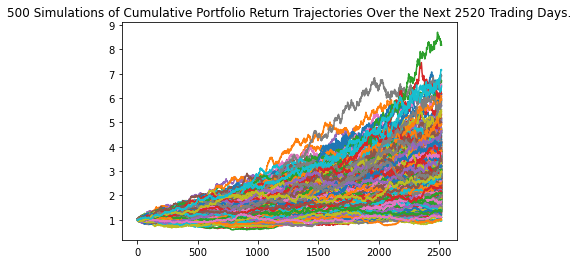

In [41]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_ten_years.plot_simulation()

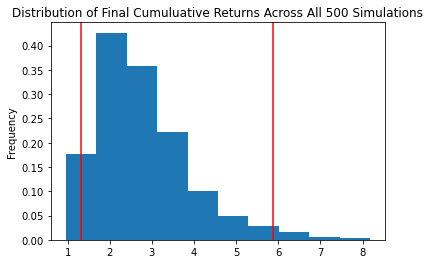

In [42]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_ten_years.plot_distribution()

In [50]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
ten_yr_stat_summary = MC_ten_years.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(ten_yr_stat_summary)

count           500.000000
mean              2.833386
std               1.207088
min               0.894273
25%               1.993846
50%               2.569472
75%               3.376393
max               9.154082
95% CI Lower      1.248542
95% CI Upper      5.848922
Name: 2520, dtype: float64


In [51]:
# Set initial investment
# YOUR CODE HERE!
ten_initial_investment = 20000 * 3
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(ten_yr_stat_summary[8]*initial_investment,2)
ci_upper_ten = round(ten_yr_stat_summary[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $74912.53 and $350935.29
